In [6]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import math
import sklearn
import pickle
from numpy import unique
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN


In [7]:
path = "C:/Users/Evint/Documents/College Classes/VANT 148 VGM/Source code/Datas/clusters.csv"
df = pd.read_csv(path)
df.head()

,ctcaa,tcaaa,caaaa,aaaag,aaagt,aagtc,agtct,gtcta,tctag,ctaga,...,taacg,tcacg,gcata,ataac,tacga,ctatc,accgc,actat,ttacg,acaca
0,5.0,3.0,2.0,2.0,1.0,6.0,3.0,2.0,3.0,3.0,...,1.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,4.0,2.0,2.0,2.0,4.0,4.0,4.0,5.0,2.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0
2,5.0,3.0,2.0,2.0,2.0,5.0,3.0,3.0,2.0,2.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,5.0,3.0,2.0,2.0,1.0,5.0,3.0,2.0,2.0,2.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4.0,2.0,2.0,3.0,1.0,4.0,5.0,3.0,3.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [8]:
X = df.values
X

array([[ 5.,  3.,  2., ...,  0.,  0.,  0.],
       [ 4.,  2.,  2., ...,  0.,  2.,  0.],
       [ 5.,  3.,  2., ...,  0.,  1.,  0.],
       ...,
       [19., 18.,  6., ..., 13., 12., 13.],
       [ 9., 11., 13., ...,  2.,  8.,  3.],
       [15., 17., 10., ..., 11., 13., 14.]])

In [9]:
model = DBSCAN()
y = model.fit_predict(X)
print(unique(y))

[-1  0  1  2  3]


In [18]:
def count_kmers(sequence, k_size):
    data = {}
    size = len(sequence)
    for i in range(size - k_size + 1):
        kmer = sequence[i: i + k_size]
        try:
            data[kmer] += 1
        except KeyError:
            data[kmer] = 1
    return data

In [20]:
path = "C:/Users/Evint/Documents/College Classes/VANT 148 VGM/Source code/Datas/agentLeadToCancer.csv"
df = pd.read_csv(path)
listDNA = list(df["DNA Strain"])

print("load the clusters data")
path = "C:/Users/Evint/Documents/College Classes/VANT 148 VGM/Source code/Datas/clusters.csv"
df_cluster = pd.read_csv(path)
kmerList = list()
for strains in listDNA:
    kmerList.append(count_kmers(strains,int(len(df_cluster.columns[0]))))
len(kmerList)
listDF = list()
for dicts in kmerList:
    dictToList = list()
    for keys in X:
        try:
            dictToList.append(dicts[keys])
        except:
            dictToList.append(0)
    listDF.append(dictToList)
z = model.predict(listDF)

load the clusters data


In [10]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)

In [12]:
y = [str(i) for i in y]

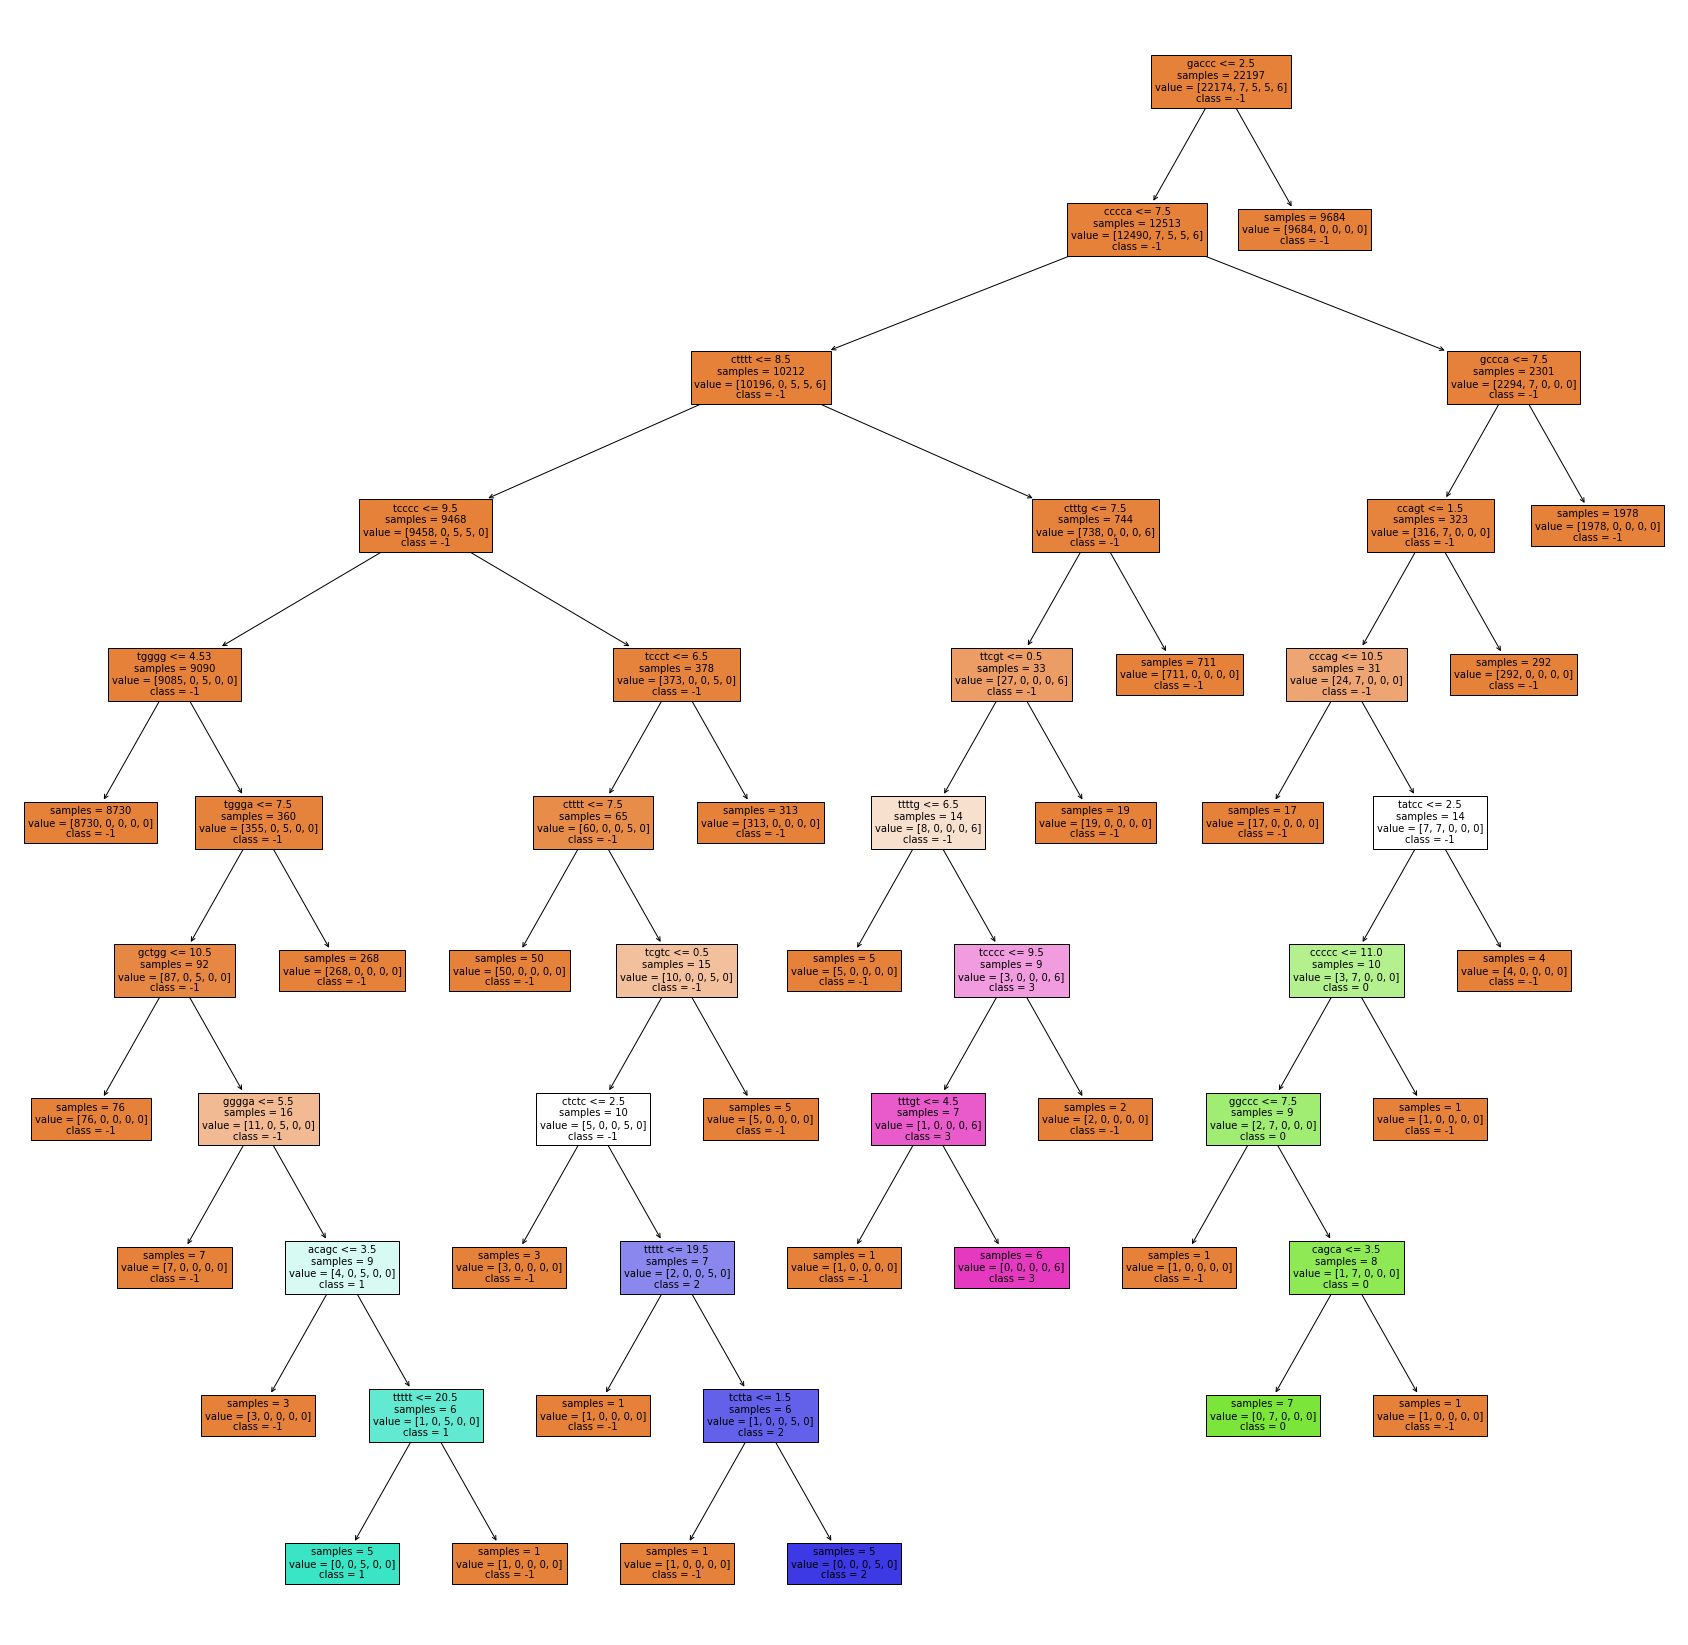

In [17]:
plt.figure(figsize=(30,30))
tree.plot_tree(dtree, 
                feature_names=df.columns, 
                class_names=unique(y),
                fontsize=10, 
                max_depth=None, 
                impurity=False,
                precision=2,
                filled=True)

plt.show()